In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load EMNIST dataset
emnist_train = pd.read_csv('emnist-letters-train.csv')
emnist_test = pd.read_csv('emnist-letters-test.csv')

In [3]:
#training_letters
y1 = np.array(emnist_train.iloc[:,0].values)
x1 = np.array(emnist_train.iloc[:,1:].values)
#testing_labels
y2 = np.array(emnist_test.iloc[:,0].values)
x2 = np.array(emnist_test.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


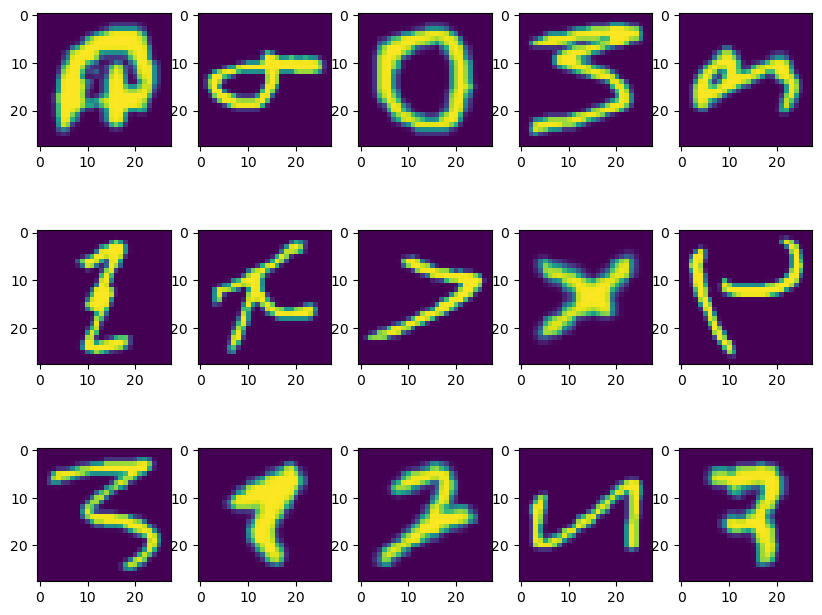

In [4]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

# Preprocess the data
X_train = emnist_train.iloc[:, 1:].values.astype('float32') / 255.0  # Normalize pixel values
y_train = emnist_train['label'].values
X_test = emnist_test.iloc[:, 1:].values.astype('float32') / 255.0
y_test = emnist_test['label'].values

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Create an artificial neural network model
model = tf.keras.models.Sequential()
# Add one flattened input layer for the pixels
model.add(tf.keras.layers.Flatten(input_shape=x1.shape[1:]))
# Add one dense hidden layers
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
# Add dropout layer to avoid overfitting
model.add(tf.keras.layers.Dropout(0.5))
# Add one dense hidden layers
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
# Add dropout layer to avoid overfitting
model.add(tf.keras.layers.Dropout(0.5))
# Add one dense output layer for the 26 characters
model.add(tf.keras.layers.Dense(units=26, activation="softmax"))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Training the model
model.fit(x1, y1, epochs=1)

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\USER\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\USER\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\USER\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\USER\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\USER\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\USER\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\USER\AppData\Local\Temp\ipykernel_15920\611045707.py", line 2, in <module>

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\losses\loss.py", line 43, in __call__

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\losses\losses.py", line 1722, in sparse_categorical_crossentropy

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\ops\nn.py", line 1567, in sparse_categorical_crossentropy

  File "C:\Users\USER\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 638, in sparse_categorical_crossentropy

Received a label value of 26 which is outside the valid range of [0, 26).  Label values: 22 10 15 16 26 4 8 4 1 13 13 25 20 21 26 18 19 21 7 4 21 18 20 7 14 3 26 2 22 1 14 10
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1445]

In [ ]:
# Evaluating the model
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

In [ ]:
# Saving the model
model.save('handwrittenOCR.model')

In [ ]:
#REPLACED WITH GUI
# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1